---------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------
# Titanic Data Visualization
# By [Alaksha Mishra]
----------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------

# 1. Introduction

The Titanic dataset is a classic case for exploring survival prediction and passenger demographics.

In this analysis, we will:

Explore survival rates across gender, class, age, and family size.

Engineer a new feature: Family Size.

Use visualizations (Matplotlib, Seaborn, Plotly) to tell a clear data story.

# 2. Import libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 5)

# Load Titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 3. Data Exploration

In [2]:
# Dataset overview
print(df.shape)
print(df.info())
df.describe(include='all').T

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Key Questions:

Did survival rates differ by gender and class?

How did age influence survival?

Does family size matter?

Which embarkation port had better survival rates?

# 4. Basic Visualization

# 4.1 Overall Survival Rate

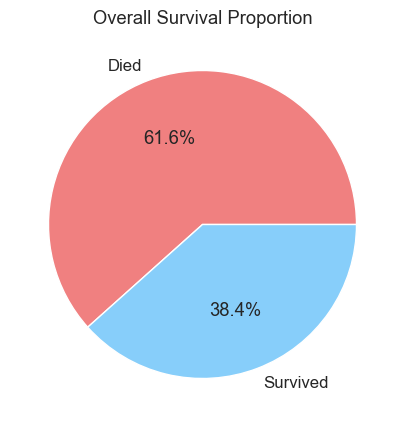

In [3]:
surv_counts = df['survived'].value_counts()
surv_counts.plot(kind='pie', labels=['Died','Survived'], autopct='%1.1f%%', colors=['lightcoral','lightskyblue'])
plt.title("Overall Survival Proportion")
plt.ylabel('')
plt.show()

# 4.2 Survival by Gender

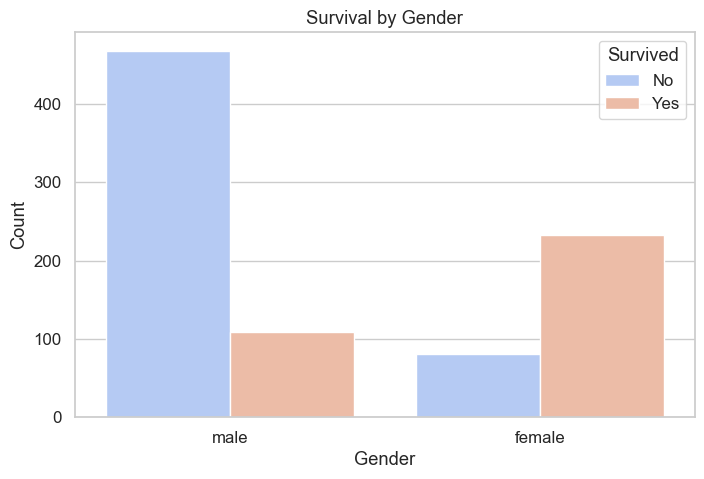

In [4]:
sns.countplot(x='sex', hue='survived', data=df, palette="coolwarm")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=['No','Yes'])
plt.show()

# 4.3 Survival by Class

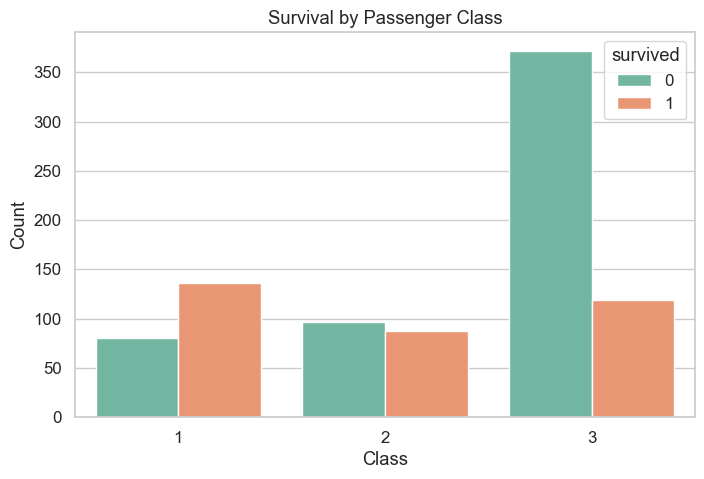

In [4]:
sns.countplot(x='pclass', hue='survived', data=df, palette="Set2")
plt.title("Survival by Passenger Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 5. Feature Engineering: Family Size

In [6]:
# Create Family Size
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Categorize family groups
df['family_group'] = pd.cut(df['family_size'], bins=[0,1,4,20], labels=['Solo','Small Family (2-4)','Large Family (5+)'])

# Preview
df[['sibsp','parch','family_size','family_group']].head()

,sibsp,parch,family_size,family_group
0,1,0,2,Small Family (2-4)
1,1,0,2,Small Family (2-4)
2,0,0,1,Solo
3,1,0,2,Small Family (2-4)
4,0,0,1,Solo


# 5.1 Survival by Family Group

C:\Users\akhil\AppData\Local\Temp\ipykernel_15348\3988732125.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




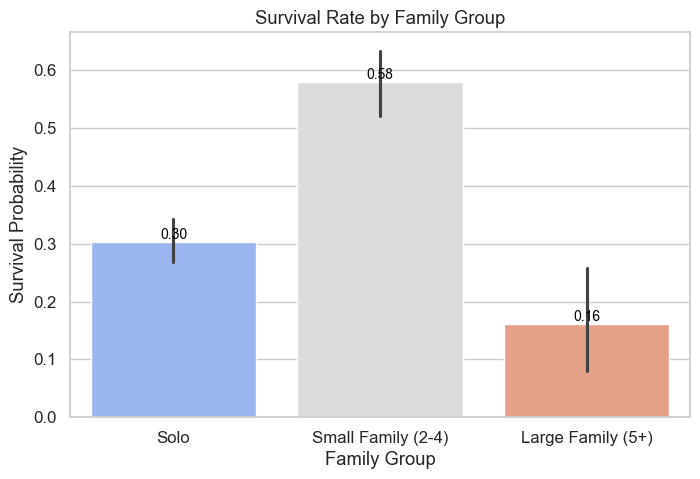

In [10]:
sns.barplot(x="family_group", y="survived", data=df, palette="coolwarm", estimator=np.mean)
plt.title("Survival Rate by Family Group")
plt.ylabel("Survival Probability")
plt.xlabel("Family Group")

# Add percentage labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

plt.show()


# 6. Age Distribution

C:\Users\akhil\AppData\Local\Temp\ipykernel_8636\1059574262.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived']==1]['age'].dropna(), label='Survived', shade=True)
C:\Users\akhil\AppData\Local\Temp\ipykernel_8636\1059574262.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived']==0]['age'].dropna(), label='Died', shade=True)


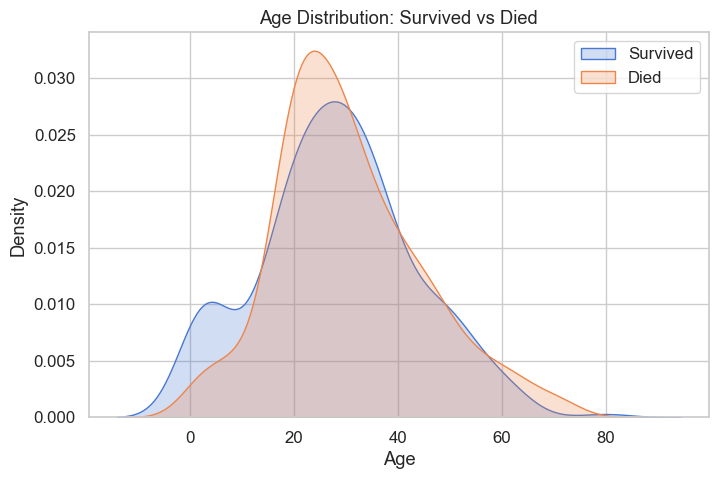

In [8]:
sns.kdeplot(df[df['survived']==1]['age'].dropna(), label='Survived', shade=True)
sns.kdeplot(df[df['survived']==0]['age'].dropna(), label='Died', shade=True)
plt.title("Age Distribution: Survived vs Died")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

# 7. Interactive Dashboards (Plotly)

# 7.1 Survival by Gender & Class

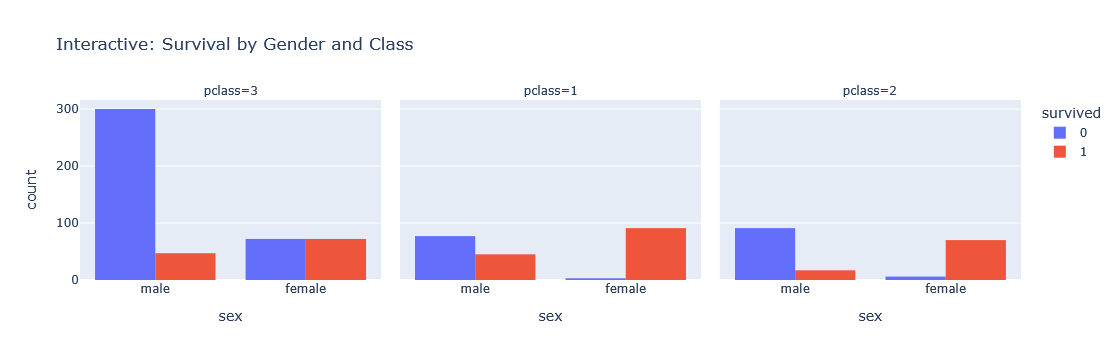

In [9]:
fig1 = px.histogram(df, x="sex", color="survived", barmode="group",
                    facet_col="pclass", category_orders={"survived":[0,1]},
                    title="Interactive: Survival by Gender and Class")
fig1.show()

# 7.2 Age vs Fare (Bubble = Family Size)

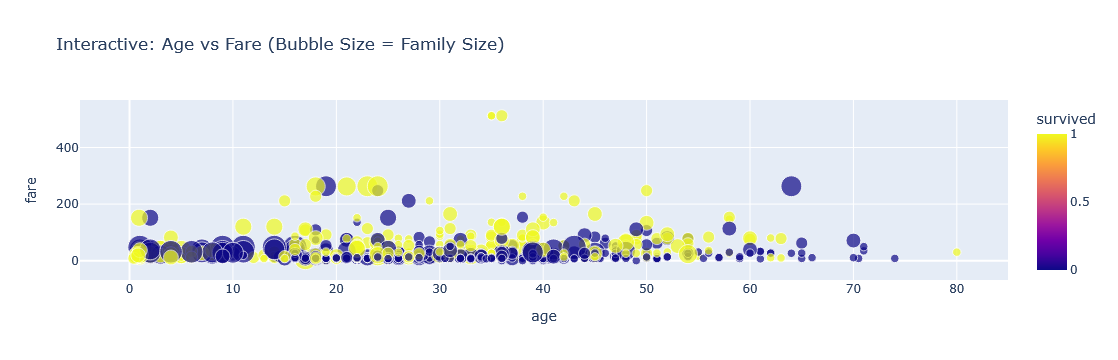

In [10]:
fig2 = px.scatter(df, x="age", y="fare", color="survived",
                  size="family_size", hover_data=["class","sex"],
                  title="Interactive: Age vs Fare (Bubble Size = Family Size)")
fig2.show()

# 7.3 Survival by Embarkation Port

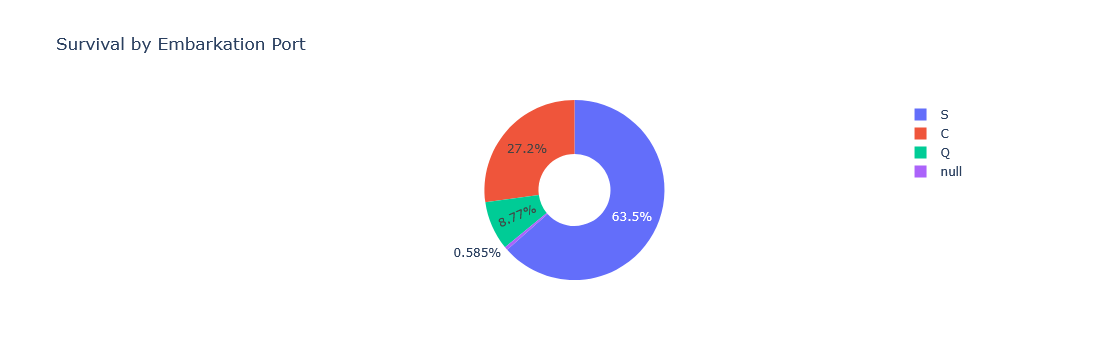

In [7]:
fig3 = px.pie(df, names="embarked", values="survived", hole=0.4,
              title="Survival by Embarkation Port")
fig3.show()

# 8. Key Insights

Gender effect: Women survived at much higher rates than men.

Class effect: First-class passengers had a survival advantage.

Family size: Small families survived best; solos and large families had lower survival.

Age: Children had better odds than older passengers.

Embarkation port: Passengers from Cherbourg (C) had slightly higher survival.

In [11]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html

# Load Titanic dataset
import seaborn as sns
df = sns.load_dataset("titanic")

# Feature Engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['family_group'] = pd.cut(df['family_size'], bins=[0,1,4,20], labels=['Solo','Small Family (2-4)','Large Family (5+)'])

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Titanic EDA Dashboard"

# Layout
app.layout = html.Div([
    html.H1("🚢 Titanic Exploratory Data Analysis Dashboard", style={'textAlign': 'center'}),

    dcc.Tabs([

        # Tab 1 - Survival Overview
        dcc.Tab(label='Survival Overview', children=[
            html.H2("Overall Survival Rate"),
            dcc.Graph(
                figure=px.pie(df, names="survived", hole=0.4,
                              color="survived",
                              color_discrete_map={0:"lightcoral", 1:"lightskyblue"},
                              title="Overall Survival Proportion")
            ),
            html.H2("Survival by Gender"),
            dcc.Graph(
                figure=px.histogram(df, x="sex", color="survived", barmode="group",
                                    title="Survival by Gender")
            ),
            html.H2("Survival by Passenger Class"),
            dcc.Graph(
                figure=px.histogram(df, x="pclass", color="survived", barmode="group",
                                    title="Survival by Class")
            ),
        ]),

        # Tab 2 - Family & Age
        dcc.Tab(label='Family & Age', children=[
            html.H2("Survival by Family Group"),
            dcc.Graph(
                figure=px.bar(df, x="family_group", y="survived", color="family_group",
                              title="Survival Probability by Family Group", barmode="group")
            ),
            html.H2("Age Distribution: Survived vs Died"),
            dcc.Graph(
                figure=px.histogram(df, x="age", color="survived", nbins=30,
                                    barmode="overlay", opacity=0.6,
                                    title="Age Distribution by Survival")
            ),
        ]),

        # Tab 3 - Fares & Embarkation
        dcc.Tab(label='Fare & Embarkation', children=[
            html.H2("Age vs Fare (Bubble = Family Size)"),
            dcc.Graph(
                figure=px.scatter(df, x="age", y="fare", color="survived",
                                  size="family_size", hover_data=["pclass","sex"],
                                  title="Age vs Fare with Family Size")
            ),
            html.H2("Survival by Embarkation Port"),
            dcc.Graph(
                figure=px.pie(df, names="embarked", values="survived", hole=0.3,
                              title="Survival by Embarkation Port")
            ),
        ]),
    ])
])

# Run server
if __name__ == '__main__':
    app.run(debug=True)
